In [49]:
!pip install mysql-connector-python pandas matplotlib seaborn scikit-learn

In [51]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',       
    password='137824',   
    database='insurance_db'
)

query = "SELECT * FROM insurance_data;"
df = pd.read_sql(query, conn)
conn.close()

df.head()


C:\Users\64284\AppData\Local\Temp\ipykernel_13428\4107354208.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.90
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.50
4,32,male,28.880,0,no,northwest,3866.86


In [75]:
# Check data types
df.info()
# Check for missing values
df.isnull().sum()
# Check for duplicate values
df.duplicated().sum()
# Removing one duplicate row
df = df.drop_duplicates()
# Summary stats 
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


0

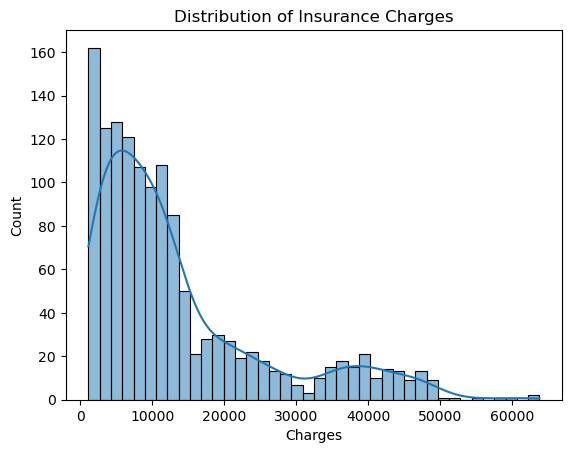

In [28]:
# Histogram: How Are Charges Spread Out? Is the data skewed?
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], bins=40, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.savefig('distribution_plot.png')
plt.show()


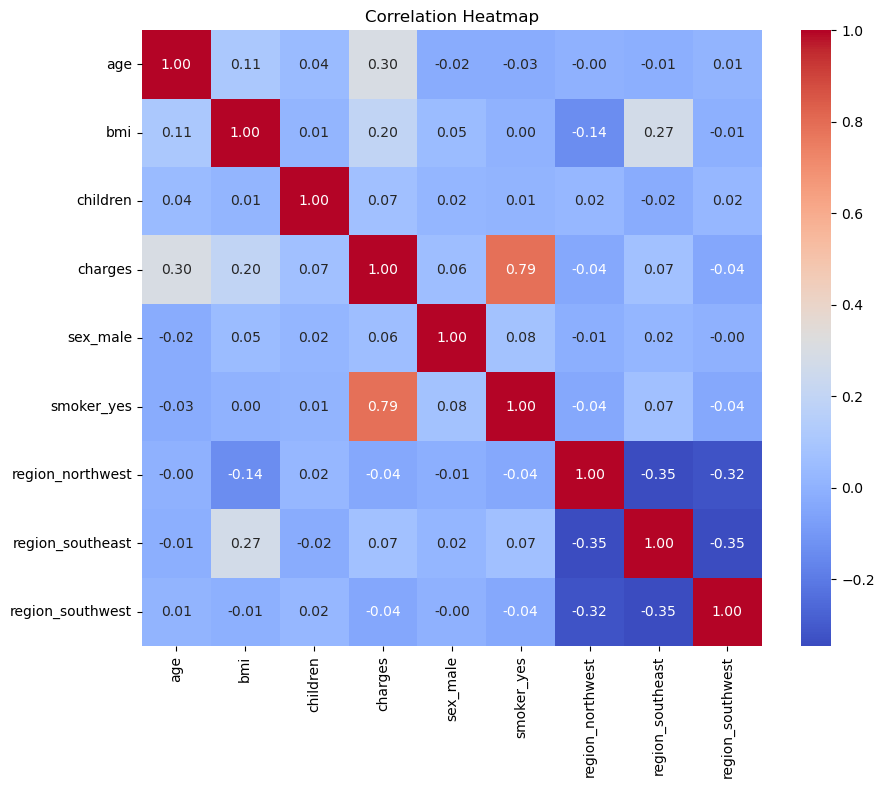

In [29]:
# Correlation heatmap
import numpy as np

# Convert categorical variables to dummy for correlation
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_plot.png')
plt.show()


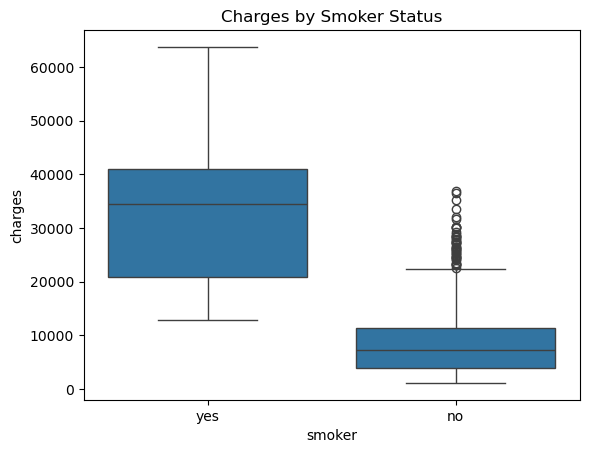

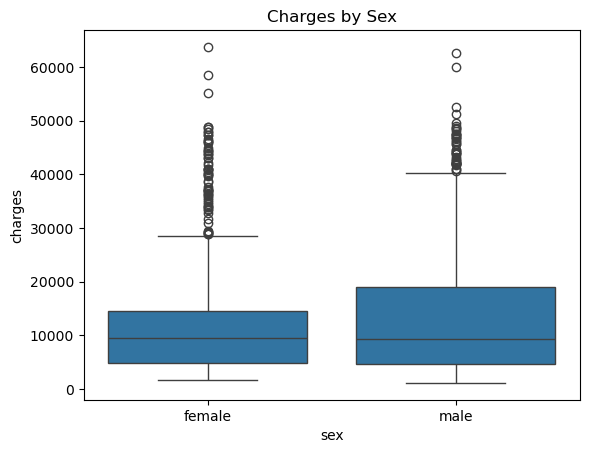

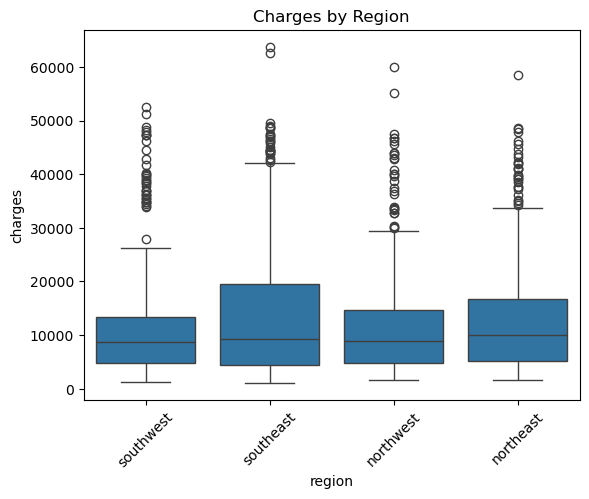

In [30]:
# Box Plots 
# Charges by Smoker Status
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status')
plt.savefig('smoker_plot.png')
plt.show()

# Charges by Sex
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Charges by Sex')
plt.savefig('sex_plot.png')
plt.show()

# Charges by Region
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges by Region')
plt.xticks(rotation=45)
plt.savefig('region_plot.png')
plt.show()


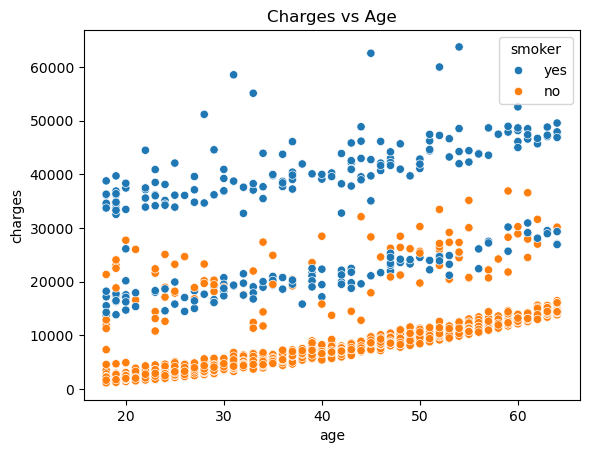

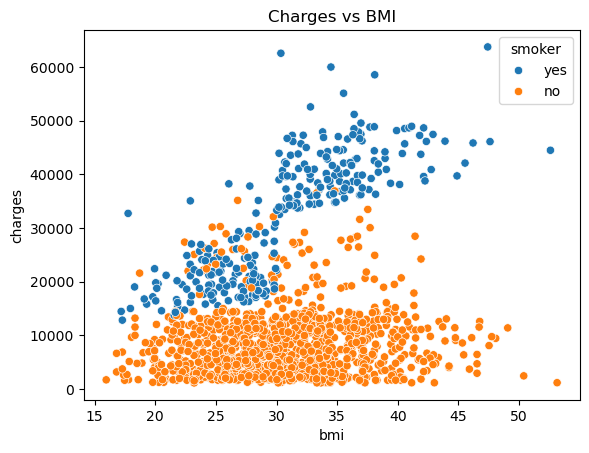

In [31]:
# Scatter Plots
# Age vs charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Charges vs Age')
plt.savefig('age_plot.png')
plt.show()

# BMI vs charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Charges vs BMI')
plt.savefig('bmi_plot.png')
plt.show()


In [63]:
# Building a regression model using Stats model package
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the dataframe to work with
data = df.copy()
df_new = df.copy()

# Prepare the data for modeling by converting categorical variables to numercial for machine learning
df_new['smoker'] = df_new['smoker'].map({'no': 0, 'yes': 1})
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

# One-hot encode multi-category region columns and dropping first to avoid dummy variable trap
df_new = pd.get_dummies(df_new, prefix= ['region'], columns=['region'], drop_first=True, dtype=int)

# Drop missing values 
df_new = df_new.dropna()

# Defining input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

# Adding constant term for intercept
X = sm.add_constant(X)

# Fitting the model
model_base = sm.OLS(y, X).fit()

# Regression summary statistics to interpret the relationship between variables
print(model_base.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        13:42:58   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

In [65]:
# Building a linear regression model using using scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Add interaction terms
df_new['bmi_smoker'] = df_new['bmi'] * df_new['smoker']
df_new['age_smoker'] = df_new['age'] * df_new['smoker']

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R² Score:", r2)

R² Score: 0.8652315480825151


In [69]:
# Create helper function to preprocess dataframe
def preprocess_df(df):

    df_new = df.copy()
    
    df_new['smoker'] = df_new['smoker'].map({'no': 0, 'yes': 1})
    
    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])
    
    df_new = pd.get_dummies(df_new, prefix= ['region'], columns=['region'], drop_first=True, dtype=int)
    
    df_new['bmi_smoker'] = df_new['bmi'] * df_new['smoker']
    df_new['age_smoker'] = df_new['age'] * df_new['smoker']
    
    return df_new

# See how model performs on validation dataset
val_df = pd.read_csv('../validation_dataset.csv')

# Applying the helper function to clean and prepare the validation dataset
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()


,age,sex,bmi,children,smoker,region,predicted_charges
0,18,female,24.090000,1,no,southeast,2690.499210
1,39,male,26.410000,0,yes,northeast,25881.953145
2,27,male,29.150000,0,yes,southeast,25818.713124
3,71,male,65.502135,13,yes,southeast,97695.371675
4,28,male,38.060000,0,no,southeast,4616.456070
